In [8]:
import os
import path
import music21
from patternfinder import geometric_helsinki

PALESTRINA_CORPUS = 'music_files/corpus/Palestrina'

In the Willaert madrigal “Amor, mi fa morire,” there is an unusual two-chord progression which occurs four times, and a fifth time transposed. It has an antique-sounding double-leading-tone cadence in the bottom three voices. Can we confirm its rarity by searching for it among Palestrina masses?

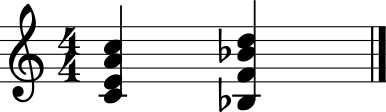

In [9]:
query = music21.stream.Stream()
query.insert(0, music21.chord.Chord(['C4', 'E4', 'A4', 'C5']))
query.insert(1, music21.chord.Chord(['B-3', 'F4', 'B-4', 'D5']))
query.show()

For this search, we use a 'warped' scale, so that the chords can be found given any rhythmic modification.

In [13]:
#for mass_path in music21.corpus.getComposer('Palestrina'): # music21 Palestrina corpus
for mass_path in [mass_file for mass_file in os.listdir(PALESTRINA_CORPUS) if mass_file[-3:] == 'xml']: # Local Palestrina corpus

    # Get an occurrence generator
    mass_finder = geometric_helsinki.Finder(query, os.path.join(PALESTRINA_CORPUS, mass_path),
                                           threshold='all',
                                           scale='warped',
                                           source_window=5)
    
    # Colour all occurrences red in the score
    for occurrence in mass_finder:
        occurrence.color_source_notes('red')
    
    # Output scores that have any coloring
    if any(n.style.color for n in mass_finder.source.flat.notes):
        # Score is stored as an attribute in the Finder object when the constructor input is a file path rather than stream object
        output = mass_finder.source.write('lily.pdf')
        # Rename output and include the settings used in the search
        os.rename(output, os.path.join('music_files', 'two_chord_data', "_".join([
            't' + str(mass_finder.settings['threshold'].user),
            's' + str(mass_finder.settings['scale'].user),
            os.path.basename(mass_path)[:-3] + 'pdf'])))